In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random

Definerer konstanter og potensial

In [2]:
T = 273.15 #[K]
k_B = 1.38*10**(-23) #[J/K]
B = 1/k_B*T
Bk = 0.01
k= Bk/B #[J]


def V(x):
    return k

Definerer sannsynligheter

In [3]:
def p_pluss(x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 -1)-V(x_0+1))) + np.exp(-B*(V(x_0)-V(x_0+1))))
    return p

def p_0(x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 -1)-V(x_0))) + np.exp(-B*(V(x_0+1)-V(x_0))))
    return p

def p_minus(x_0):
    p = 1/(1 + np.exp(-B*(V(x_0 +1)-V(x_0-1))) + np.exp(-B*(V(x_0)-V(x_0-1))))
    return p

Definerer random walk funksjonen

In [9]:
def randomWalk(antall_partikler, antall_steg):
    posisjoner = np.zeros(antall_partikler)
    for p in range(0,antall_partikler):
        pos = startpos
        for s in range (0,antall_steg):
            tilfeldig = random.uniform(0.0,1.0)
            if (tilfeldig <= p_minus(startpos)):
                pos -= 1
            elif (tilfeldig > (1-p_pluss(startpos))):
                pos += 1
            else:
                pos = pos
        posisjoner[p] = pos
    return posisjoner


Vekting av elementer i liste

In [5]:
def vekting(array):
    andeler = []
    posisjoner, antall = np.unique(array,return_counts=True)
    for i in range(0,len(antall)):
        andel = antall[i]/len(array)
        andeler.append(andel)
    np.array(posisjoner)
    np.array(andeler)
    return posisjoner, andeler
        

Definerer parametere ??

In [6]:
antall_partikler = 1000
antall_steg = 20
startpos = 0


Prøver å kjøre

In [7]:
posisjoner = randomWalk(antall_partikler,antall_steg)
print(posisjoner)
x,y = vekting(posisjoner)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

Prøver å plotte

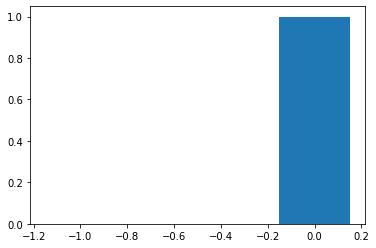

In [8]:
plt.bar(x,y,width=0.3)
plt.show()